# Laboratorium 3
### ADAM GAWRYŚ, DAWID KLEINA

Importowanie potrzebnych bibliotek

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

### Zadanie 1

Załadowanie i przypisanie zbioru danych 

In [ ]:
df = pd.read_csv("Sales_Transactions_Dataset_Weekly.csv")

In [ ]:
df = df.iloc[:, 1:53]
df.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9


Standaryzacja naszych danych

In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.columns = df.columns

### Zadanie 2

#### Pierwszy algorytm - k-means++ 
Zdefiniowanie algorytmu

In [ ]:
kmeans_p = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_p = kmeans_p.fit_predict(scaled_df)

Funkcja odpowiedzialna za wpisywanie przez użytkownika liczby klastrów

In [ ]:
def KMeans_n_clusters():
    x = input("Podaj ilość klastrów: ")
    return KMeans(n_clusters = x, init = 'random', random_state = 42)

Przykładowo wpisujemy liczbę: 5


In [ ]:
a = KMeans_n_clusters()
a

Podaj ilość klastrów: 5


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters='5', n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Definiowanie centroidów dla algorytmu k-means++

In [ ]:
kmeans_p.cluster_centers_

Kod odpowiedzialny za tworzenie wykresu

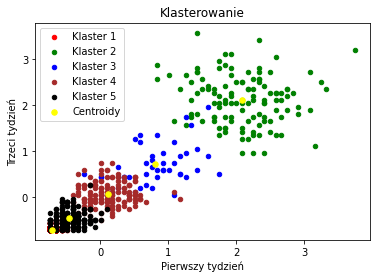

In [ ]:
plt.scatter(scaled_df[y_kmeans_p == 0]['W0'], scaled_df[y_kmeans_p == 0]['W2'], s = 20, c = 'red', label = 'Klaster 1')
plt.scatter(scaled_df[y_kmeans_p == 1]['W0'], scaled_df[y_kmeans_p == 1]['W2'], s = 20, c = 'green', label = 'Klaster 2')
plt.scatter(scaled_df[y_kmeans_p == 2]['W0'], scaled_df[y_kmeans_p == 2]['W2'], s = 20, c = 'blue', label = 'Klaster 3')
plt.scatter(scaled_df[y_kmeans_p == 3]['W0'], scaled_df[y_kmeans_p == 3]['W2'], s = 20, c = 'brown', label = 'Klaster 4')
plt.scatter(scaled_df[y_kmeans_p == 4]['W0'], scaled_df[y_kmeans_p == 4]['W2'], s = 20, c = 'black', label = 'Klaster 5')
plt.scatter(kmeans_p.cluster_centers_[:, 0], kmeans_p.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroidy')
plt.title('Klasterowanie')
plt.xlabel('Pierwszy tydzień')
plt.ylabel('Trzeci tydzień')
plt.legend()
plt.show()

### Algorytm drugi - k-means
Zdefiniowanie funkcji k-means

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)

Funkcja odpowiedzialna za wpisywanie przez użytkownika liczby klastrów

In [ ]:
def KMeans_n_clusters():
    x = input("Podaj ilość klastrów: ")
    return KMeans(n_clusters = x, init = 'random', random_state = 42)

In [ ]:
b = KMeans_n_clusters()
b

Podaj ilość klastrów: 5


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters='5', n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Definiowanie centroidów dla algorytmu k-means

In [ ]:
kmeans.cluster_centers_

Kod odpowiedzialny za tworzenie wykresu

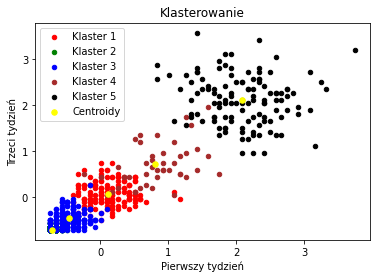

In [ ]:
plt.scatter(scaled_df[y_kmeans == 0]['W0'], scaled_df[y_kmeans == 0]['W2'], s = 20, c = 'red', label = 'Klaster 1')
plt.scatter(scaled_df[y_kmeans == 1]['W0'], scaled_df[y_kmeans == 1]['W2'], s = 20, c = 'green', label = 'Klaster 2')
plt.scatter(scaled_df[y_kmeans == 2]['W0'], scaled_df[y_kmeans == 2]['W2'], s = 20, c = 'blue', label = 'Klaster 3')
plt.scatter(scaled_df[y_kmeans == 3]['W0'], scaled_df[y_kmeans == 3]['W2'], s = 20, c = 'brown', label = 'Klaster 4')
plt.scatter(scaled_df[y_kmeans == 4]['W0'], scaled_df[y_kmeans == 4]['W2'], s = 20, c = 'black', label = 'Klaster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroidy')
plt.title('Klasterowanie')
plt.xlabel('Pierwszy tydzień')
plt.ylabel('Trzeci tydzień')
plt.legend()
plt.show()

### Zadanie 3 


Klasteryzacja aglomeracyjna

In [ ]:
clustering = AgglomerativeClustering().fit(scaled_df)
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [ ]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Funkcja odpowiedzialna za tworzenie wykresu

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


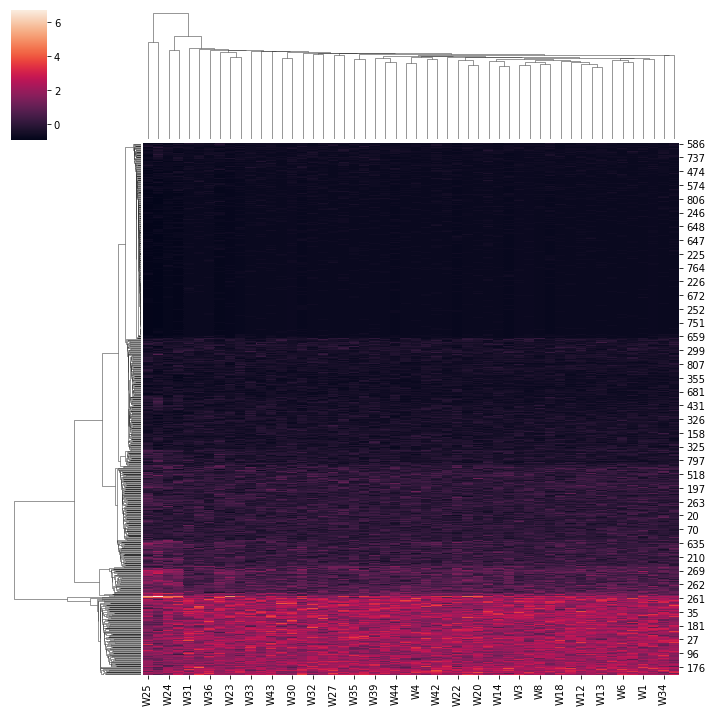

In [ ]:
sns.clustermap(scaled_df)
plt.show()

#### DBSCAN – wykres z oznaczeniem klastrów (kolor + symbol)
Kod odpowiedzialny za działanie algorytmu DBSCAN

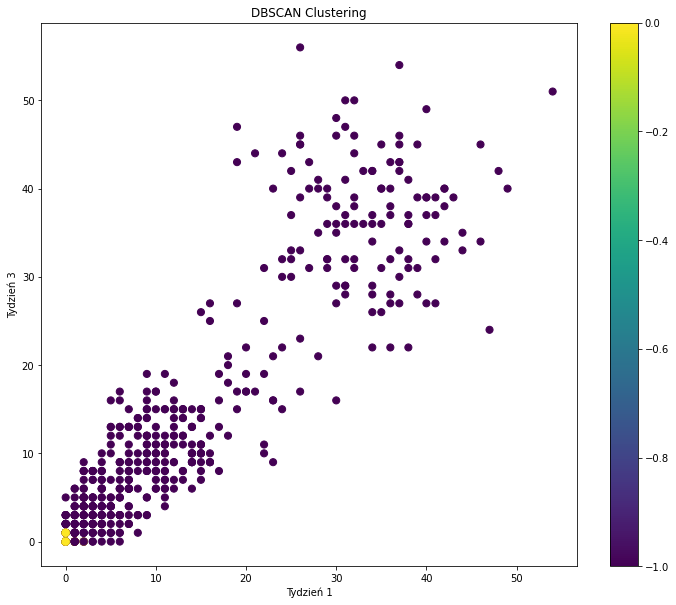

In [ ]:
clt = DBSCAN()
model = clt.fit(scaled_df)
clusters = pd.DataFrame(model.fit_predict(scaled_df))
df["Cluster"] = clusters
 
 
fig = plt.figure(figsize=(12,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(df['W0'],df['W2'], c=df["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("Tydzień 1")
ax.set_ylabel("Tydzień 3")
plt.colorbar(scatter)
plt.show()

### Zadanie 4


Kod odpowiedzialny za zwizualizowanie miary silhouette

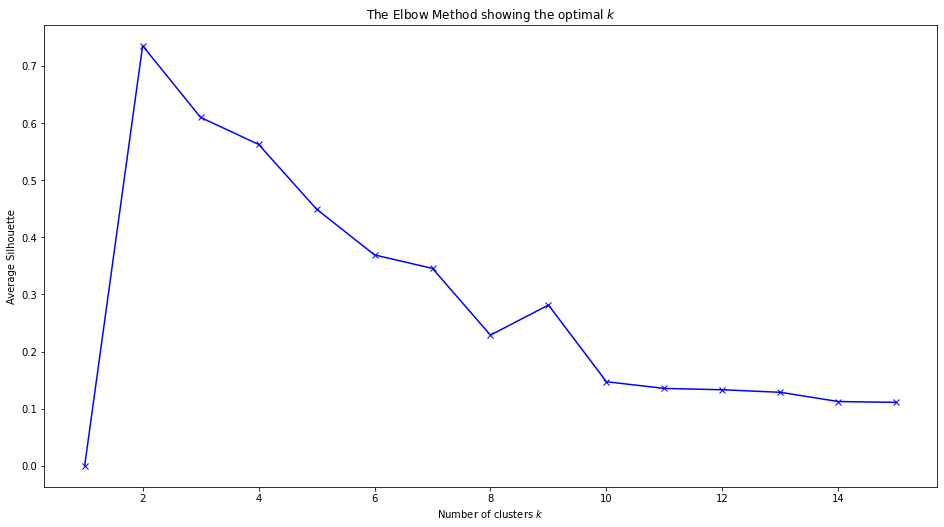

In [ ]:
scores = [0]
for i in range(2,16):
    fitx = KMeans(n_clusters=i, init='random', n_init=5, random_state=109).fit(scaled_df)
    score = silhouette_score(scaled_df, fitx.labels_)
    scores.append(score)
    
plt.figure(figsize=(16,8.5))
plt.plot(range(1,16), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

## Wnioski
Niniejsze laboratorium nie było najłatwiejsze, ponieważ wymagało dobrego zaznajomienia się z tematem klasteryzacji. Algorytmy, którymi się posługiwaliśmy w tych ćwiczeniach znaliśmy już wcześniej, ale bardziej w wersji teorytycznej, a nie kodowej i implementacyjnej. Problematyczny okazał się również też sam zbiór danych, ze względu na swoją wielkość, gdyż tak naprawdę nie mieliśmy do czynienia z tak wielowymiarowym datasetem. Wyniki klasteryzacji w zadaniu 2 są bardzo podobne, a zwłaszcza wykresy klasteryzacji. W zadaniu 3 skorzystaliśmy z klasteryzacji aglomeracyjnej oraz DBSCAN'u i dzięki temu możemy zobaczyć jak przedstawiona została sytucja w postaci ciekawych wykresów. Dwie nowe rzeczy, które poznaliśmy to dendrogram i mapa cieplna, która pokazuje (w kształcie drzewa) związki pomiędzy wybranymi elementami na podstawie przyjętego kryterium. Zadanie 4 zobrazowało nam działanie miary "silhouette". Z tego co udało nam się o niej dowiedzieć to nazywany ją miarą wewnętrzną, ponieważ wykorzystuje w swej ocenie średnią odległość pomiędzy obserwacjami wewnątrz grupy (a) i średnią odległość obserwacji do najbliższej „obcej” grupy (b). 